## Global Vectors for Word Representation:

GloVe (Global Vectors for Word Representation) embeddings are a type of word embeddings used to represent words in a numerical format that can be understood and processed by machine learning models.

 - They are derived from analyzing word co-occurrence statistics in a large corpus. 
 - Each word is represented as a dense vector in a continuous space, capturing semantic relationships. Similar words have similar vectors. GloVe embeddings are context-aware, preserving word meanings based on usage. 
 - Pre-trained on extensive text data, they offer efficient and meaningful word representations. 

They enhance various NLP tasks such as word similarity measurement, document classification, and sentiment analysis, enabling models to understand semantics and generalize effectively.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk 
# NLTK (Natural Language Toolkit) is a leading platform for 
# building Python programs to work with human language data.
from sklearn.preprocessing import LabelBinarizer
# LabelBinarizer is a class in the scikit-learn library, which is used 
# for transforming labels or target variables into a binary 
# representation suitable for machine learning algorithms.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
# CountVectorizer is a text preprocessing tool that transforms 
# raw text data into a matrix of token counts, representing the 
# frequency of each word (token) in the documents.
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# The main purpose of the PorterStemmer is to normalize words by 
# removing common suffixes to obtain their base form.
from nltk.stem import WordNetLemmatizer
# The WordNetLemmatizer is a lemmatization tool provided by the Natural 
# Language Toolkit (NLTK) library in Python. Lemmatization is the process 
# of reducing words to their base or root form, known as the "lemma" 
# which represents the canonical or dictionary form of the word.
from nltk.tokenize import word_tokenize, sent_tokenize
# word_tokenize is used to break a text (a sentence or a paragraph) 
# into individual words.
# sent_tokenize is used to split a text into individual sentences. 
# It is a sentence tokenizer that separates text into sentences based on 
# the presence of punctuation marks (e.g., '.', '?', '!').
from nltk import pos_tag
# The pos_tag function uses pre-trained models and linguistic knowledge 
# to analyze the words in the input sentence and determine their 
# corresponding part-of-speech tags.
from nltk.corpus import wordnet
# WordNet is a lexical database for the English language.
import keras
from keras.preprocessing import text, sequence
# 'sequence' offers tools for converting text data into sequences of 
# integers and for padding or truncating sequences to a fixed length.
# 'text' includes classes and functions for text tokenization, 
# sequence padding, and generating word embeddings.
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.callbacks import ReduceLROnPlateau
# Used to automatically adjust the learning rate during training to 
# optimize the performance of the model.
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup
# BeautifulSoup is a Python library used for web scraping and 
# parsing HTML and XML documents.
import re, string, unicodedata
from string import punctuation
import tensorflow as tf
from collections import Counter
# The Counter class is a powerful tool for counting the occurrences 
# of elements in a collection, such as lists, tuples, or strings.
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
true = pd.read_csv('True.csv')
false = pd.read_csv('Fake.csv')
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
false.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true['Category'] = 1
false['Category'] = 0
df = pd.concat([true, false])
df = shuffle(df).reset_index(drop = True)
df.head()

,title,text,subject,date,Category
0,Venezuela's Maduro says 'terrorists' stole wea...,CARACAS (Reuters) - Venezuelan leftist Preside...,worldnews,"December 20, 2017",1
1,Venezuela ex-prosecutor gives U.S. evidence on...,GENEVA (Reuters) - Venezuela s former chief pr...,worldnews,"October 13, 2017",1
2,You Won’t Believe What This Michigan Teacher ...,"A Battle Creek, Michigan substitute teacher ha...",News,"April 27, 2016",0
3,Donald Trump's Hollywood Walk of Fame star van...,LOS ANGELES (Reuters) - Donald Trump’s star on...,politicsNews,"October 26, 2016",1
4,North Korean defector pushes diplomatic soluti...,WASHINGTON (Reuters) - A rare high-level defec...,worldnews,"November 1, 2017",1


<AxesSubplot:xlabel='Category', ylabel='count'>

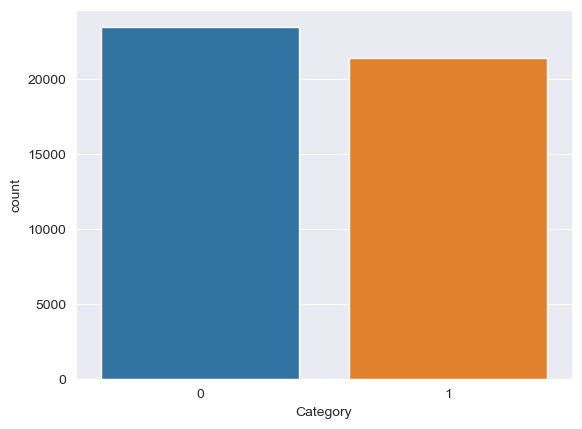

In [5]:
sns.set_style("darkgrid")
sns.countplot(df['Category'])

In [6]:
df['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

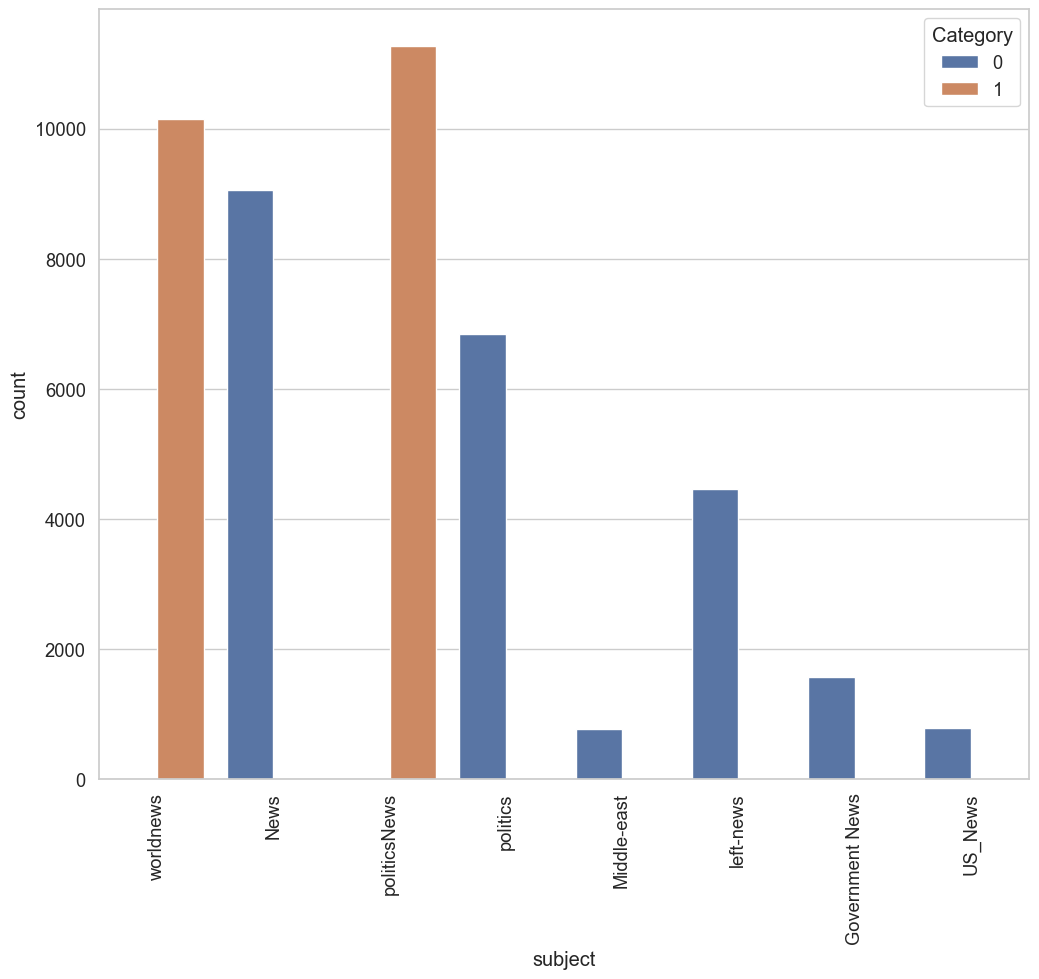

In [7]:
plt.figure(figsize = (12,10))
sns.set(style = 'whitegrid', font_scale = 1.2)
chart = sns.countplot(x = 'subject', hue = 'Category', data = df)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

The topics in `subject` column are different for both categories, hence we can exclude it from the final `text` column. 

In [8]:
df['text'] = df['text'] + " " + df['title']
del df['title']
del df['subject']
del df['date']

**StopWords:**

In natural language processing (NLP), stopwords are common words that are typically removed from text during text preprocessing. These words are considered to have little semantic meaning or importance in understanding the overall context of a sentence or document. Examples of stopwords in English include "the", "and", "is", "of", "in", "a", "an", "to" and so on.

In [9]:
stop = set(stopwords.words('english'))
# Get a set of common English stopwords. 
# The stop variable will now hold this set of stopwords.
punctuation = list(string.punctuation)
# This line imports the string module and gets a list 
# of punctuation symbols using string.punctuation
stop.update(punctuation)
# This line updates the 'stop' set by adding all the punctuation 
# symbols to it. 

### Data Cleaning:

In [10]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing the square brackets:
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URLs:
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

# Removing the stopwords from text:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

# Removing the noisy text:
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

# Apply function on review column:
df['text'] = df['text'].apply(denoise_text)

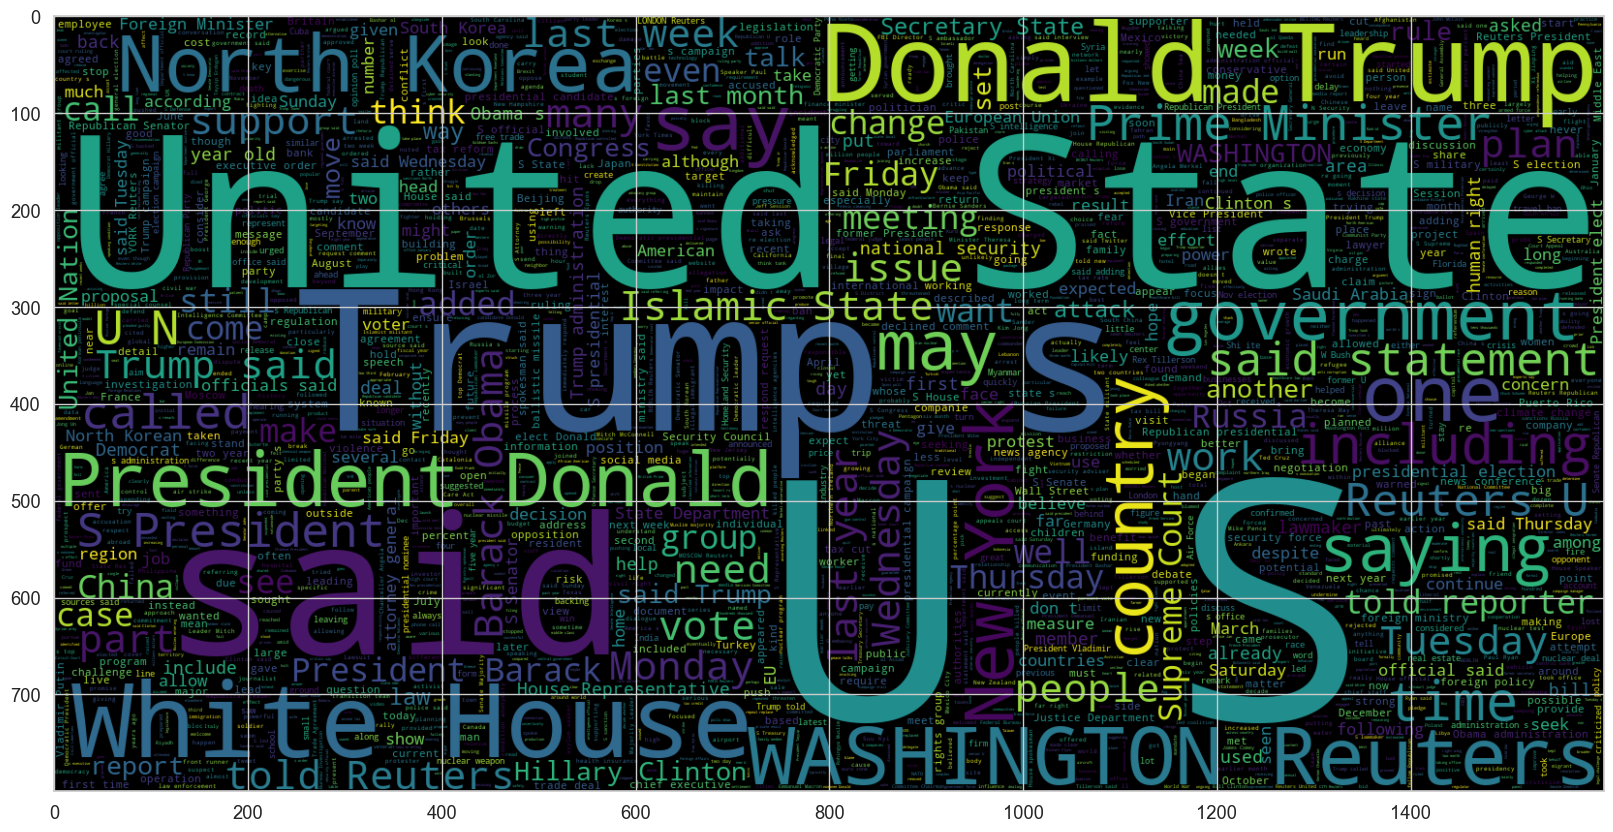

In [11]:
# WordCloud For Real Text:
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(df[df['Category'] == 1].text))
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

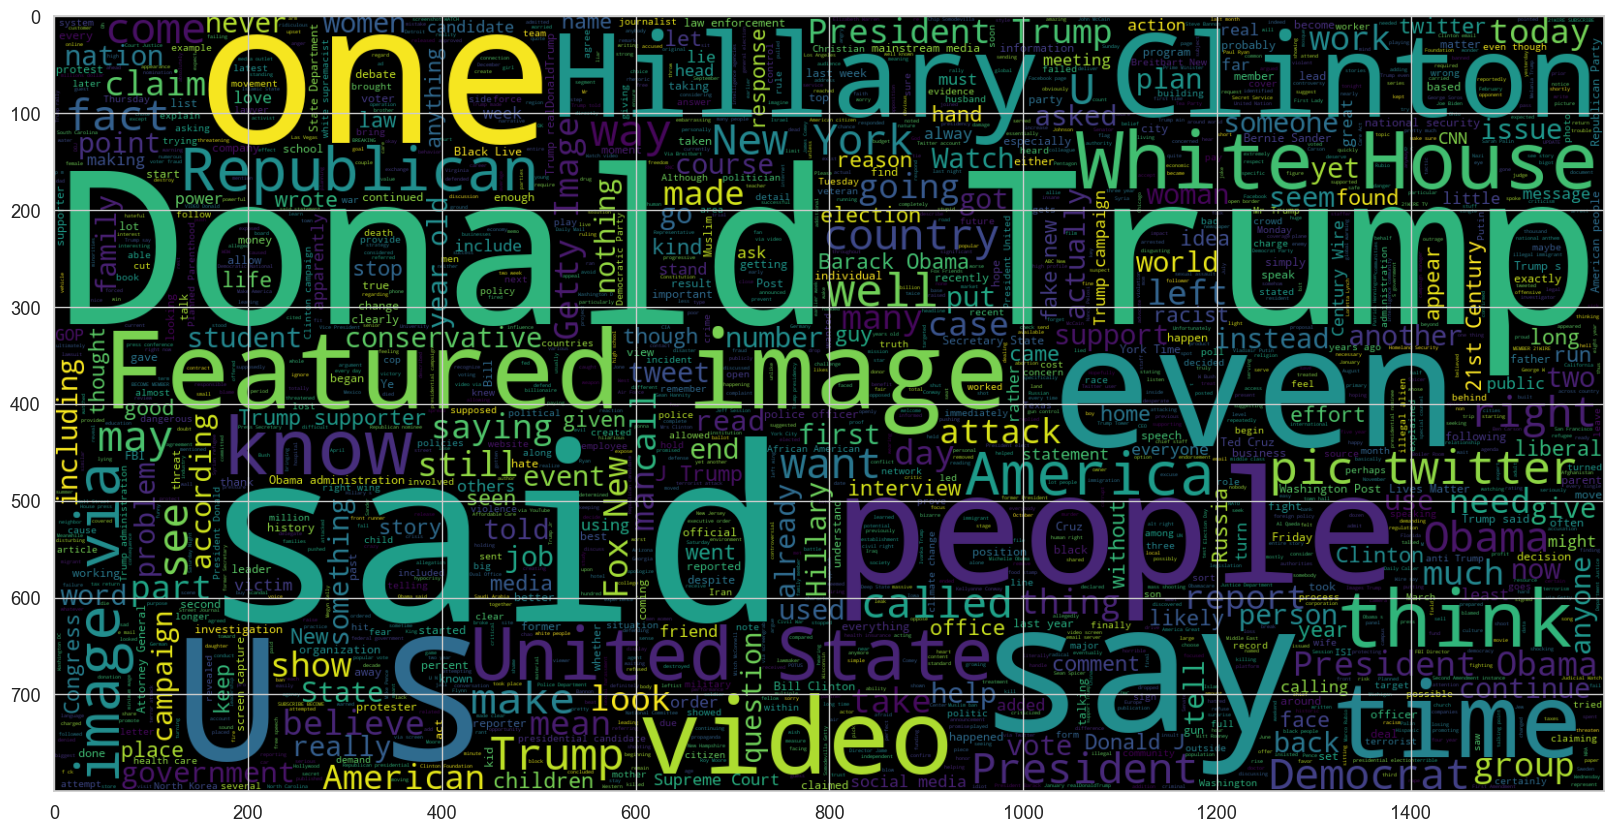

In [12]:
# WordCloud For Fake Text:
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(df[df['Category'] == 0].text))
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

### Exploratory Data Analysis:

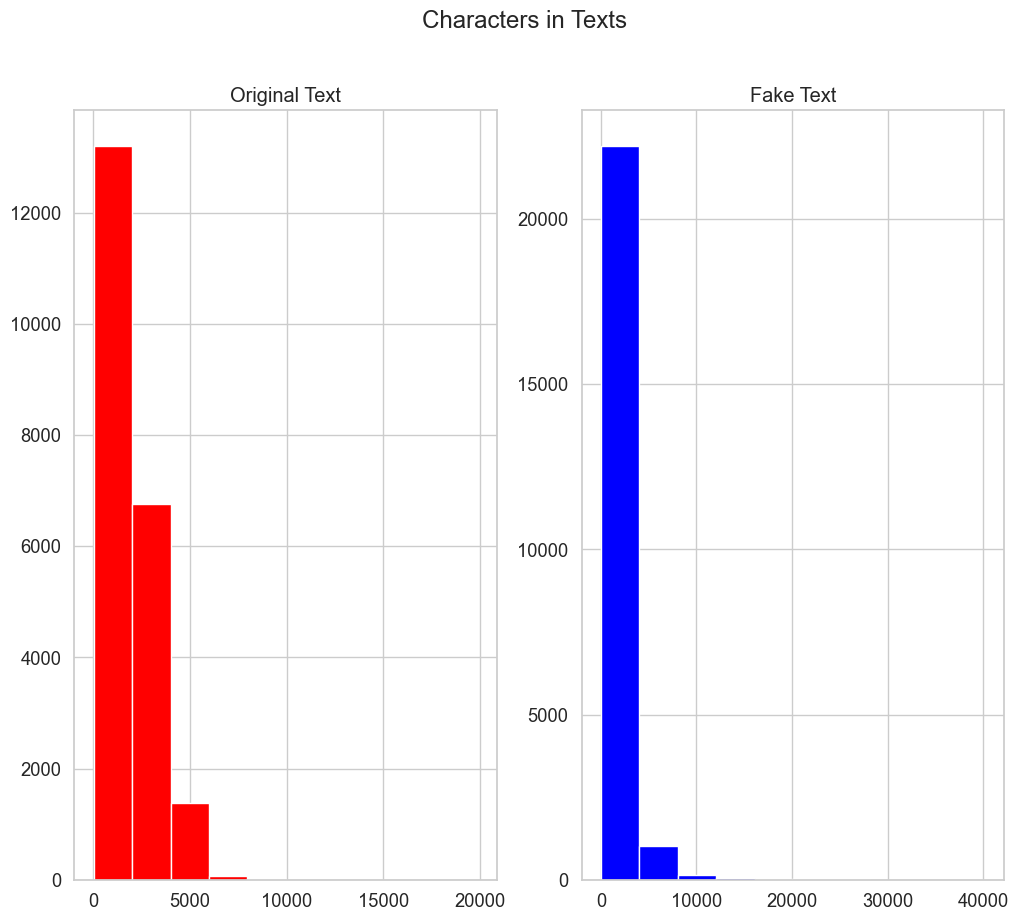

In [13]:
# Number of Characters in the Text:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 10))
text_len = df[df['Category'] == 1]['text'].str.len()
ax1.hist(text_len, color = 'red')
ax1.set_title('Original Text')
text_len = df[df['Category'] == 0]['text'].str.len()
ax2.hist(text_len, color = 'blue')
ax2.set_title('Fake Text')
fig.suptitle('Characters in Texts')
plt.show()

2500 characters in text is the most common in original text category while around 5000 characters in text are most common in fake text category.

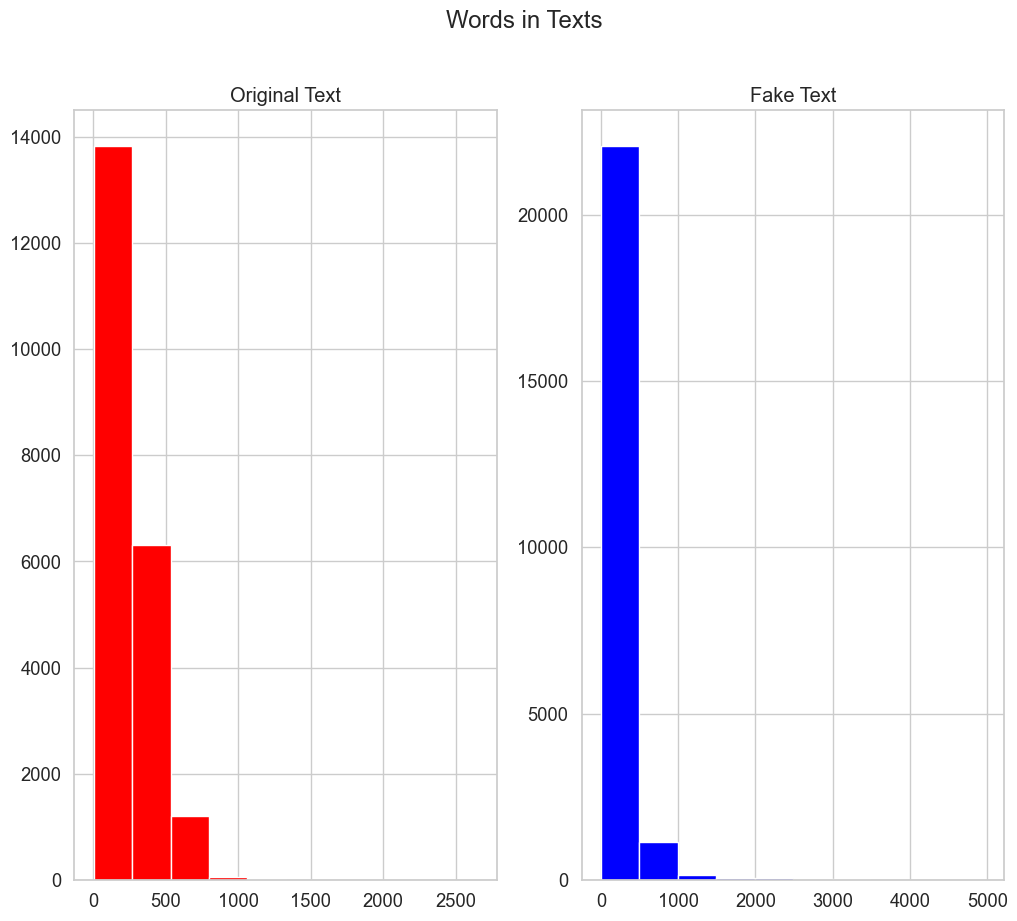

In [14]:
# Number of Words in Each Text:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 10))
text_len = df[df['Category'] == 1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len, color = 'red')
ax1.set_title('Original Text')
text_len = df[df['Category'] == 0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len, color = 'blue')
ax2.set_title('Fake Text')
fig.suptitle('Words in Texts')
plt.show()

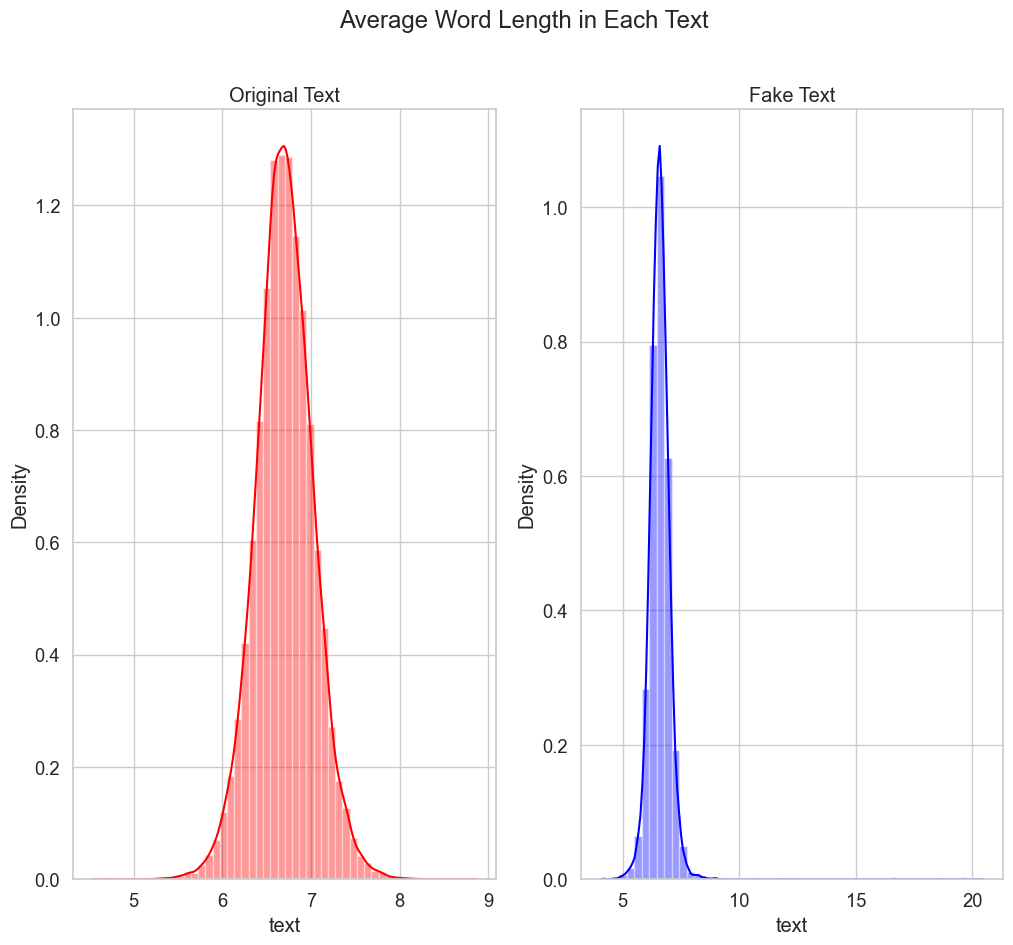

In [15]:
# Average Word Length in a Text:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 10))
word = df[df['Category'] == 1]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax = ax1, color = 'red')
ax1.set_title('Original Text')
word = df[df['Category'] == 0]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax = ax2, color = 'blue')
ax2.set_title('Fake Text')
fig.suptitle('Average Word Length in Each Text')
plt.show()

In [16]:
# Get Corpus:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df['text'])
corpus[:5]

['CARACAS', '(Reuters)', 'Venezuelan', 'leftist', 'President']

In [17]:
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'Trump': 111503,
 'said': 93162,
 'would': 54613,
 'U.S.': 50441,
 'President': 33180,
 'people': 33115,
 'also': 30325,
 'one': 29370,
 'Donald': 27795,
 'said.': 26194}

In [18]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range = (g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

**Unigram Analysis:**

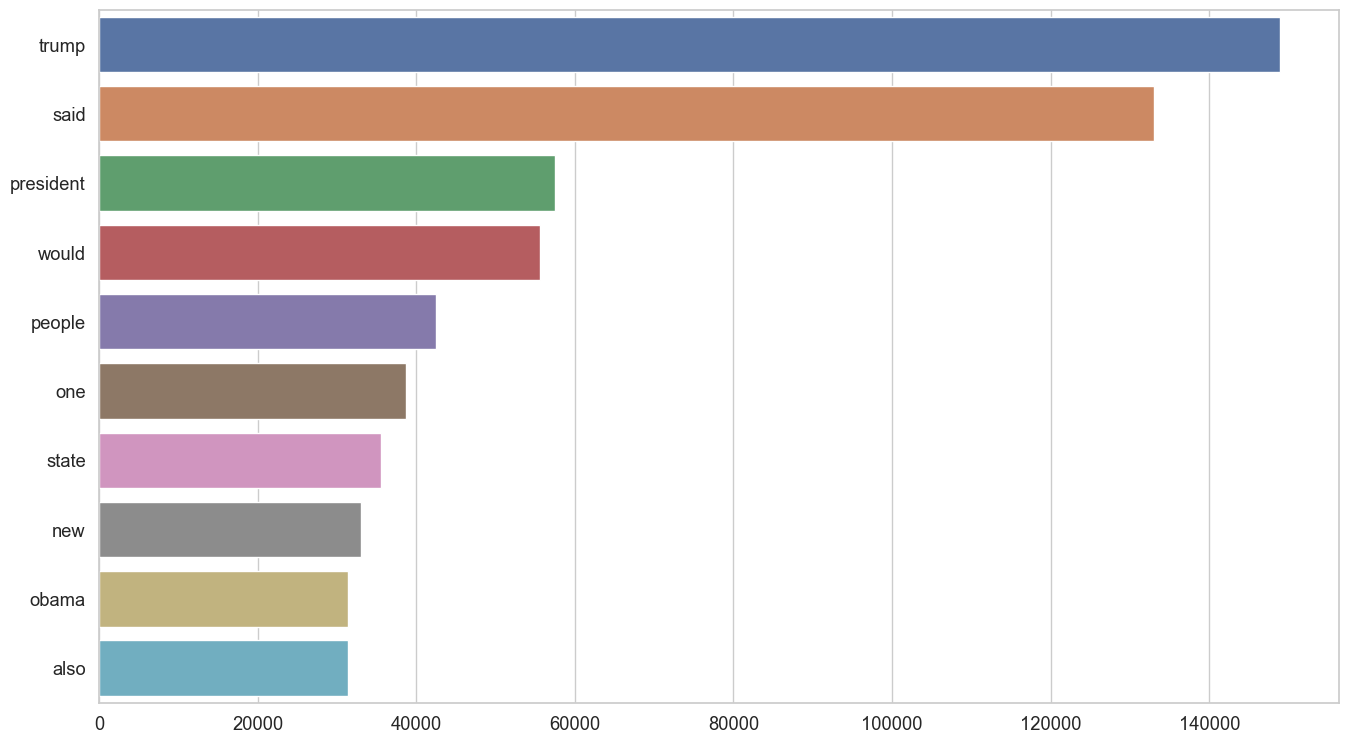

In [19]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x = list(most_common_uni.values()), y = list(most_common_uni.keys()))
plt.show()

**Bigram Analysis:**

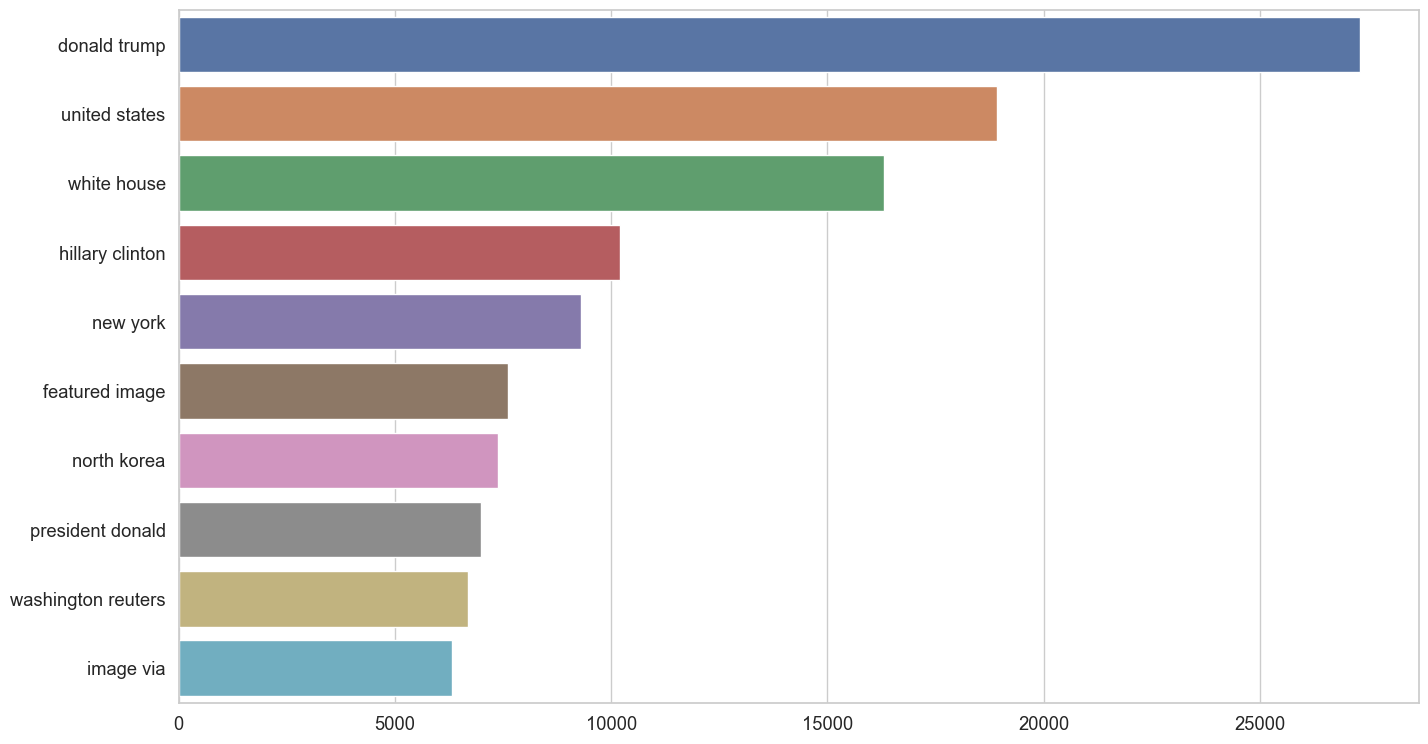

In [20]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df.text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x = list(most_common_bi.values()), y = list(most_common_bi.keys()))
plt.show()

**Trigram Analysis:**

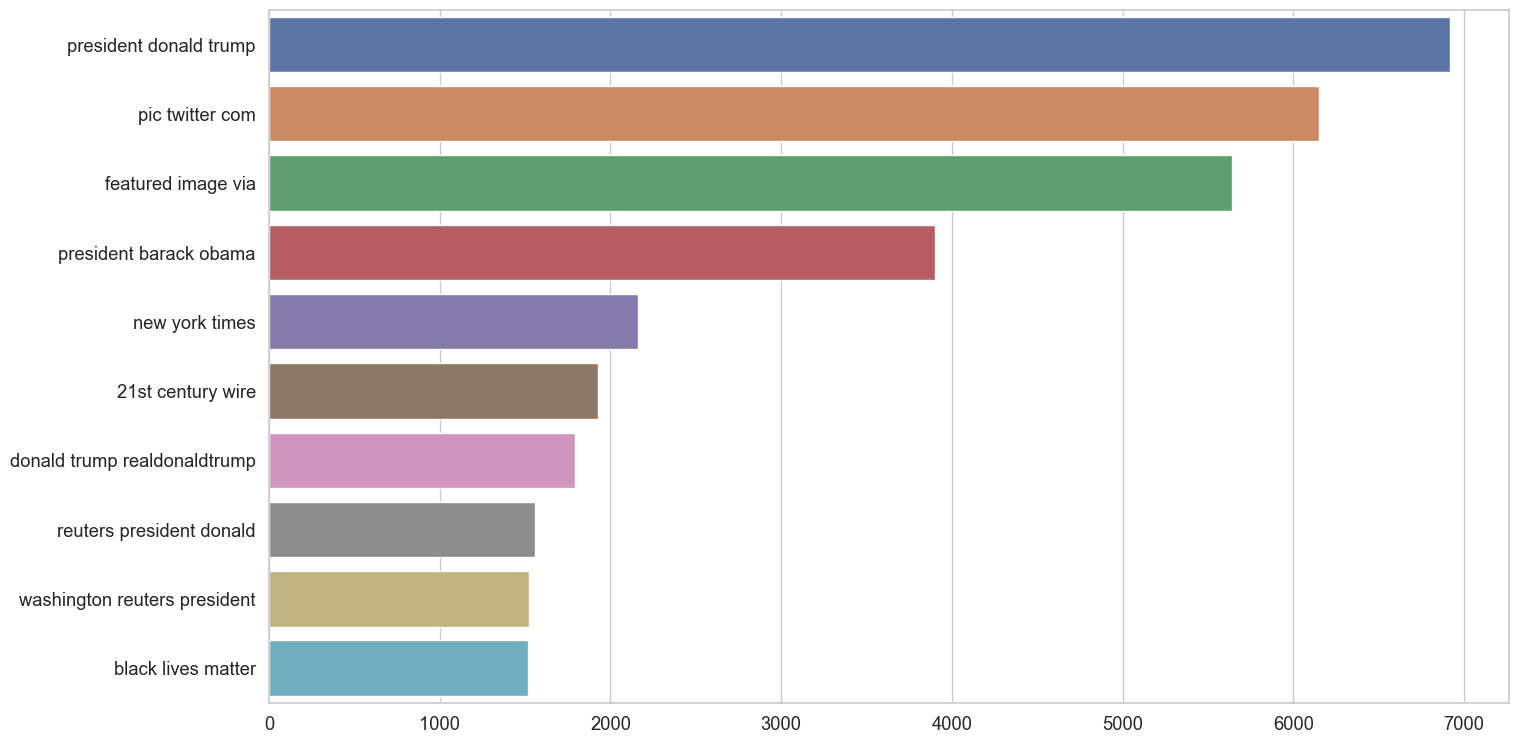

In [21]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(df.text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x = list(most_common_tri.values()), y = list(most_common_tri.keys()))
plt.show()

### Training The Model:

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['Category'], random_state = 0)
max_features = 10000
maxlen = 300
tokenizer = text.Tokenizer(num_words = max_features)
# A tokenizer is a tool or function used to break down text into 
# smaller units called tokens. 
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
# This line uses the fitted tokenizer to convert the text 
# in x_train into sequences of integers.
X_train = tf.keras.preprocessing.sequence.pad_sequences(tokenized_train, maxlen = maxlen)
# This line pads the sequences in tokenized_train to a fixed length 
# maxlen. It ensures that all text sequences have the same length, which 
# is essential for feeding data into neural networks that require 
# fixed-size inputs. Sequences longer than maxlen will be truncated, and 
# shorter sequences will be padded with zeros.
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = tf.keras.preprocessing.sequence.pad_sequences(tokenized_test, maxlen = maxlen)

In [23]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
EMBEDDING_FILE = 'glove.twitter.27B.100d.txt'
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE, encoding='utf-8'))

In [24]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]
# It represents the number of dimensions in the word embeddings.

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
# Change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [25]:
# Model Parameters:
batch_size = 256
epochs = 6
embed_size = 100
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1, factor=0.5, min_lr=0.00001)

In [26]:
# Defining Neural Network:
model = Sequential()
# Non-trainable embedding layer:
model.add(Embedding(max_features, output_dim = embed_size, weights = [embedding_matrix], input_length = maxlen, trainable = False))
# LSTM:
model.add(LSTM(units = 128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units = 64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = keras.optimizers.Adam(lr = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 300, 128)          117248    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [27]:
history = model.fit(X_train, y_train, batch_size = batch_size, 
                    validation_data = (X_test,y_test), epochs = epochs,
                    callbacks = [learning_rate_reduction])

Epoch 1/6
132/132 [==============================] - 2742s 21s/step - loss: 0.1365 - accuracy: 0.9449 - val_loss: 0.0302 - val_accuracy: 0.9896 - lr: 0.0100
Epoch 2/6
132/132 [==============================] - 3840s 29s/step - loss: 0.0333 - accuracy: 0.9892 - val_loss: 0.0156 - val_accuracy: 0.9947 - lr: 0.0100
Epoch 3/6
132/132 [==============================] - 4002s 30s/step - loss: 0.0169 - accuracy: 0.9944 - val_loss: 0.0106 - val_accuracy: 0.9970 - lr: 0.0100
Epoch 4/6
132/132 [==============================] - 3853s 29s/step - loss: 0.0139 - accuracy: 0.9952 - val_loss: 0.0127 - val_accuracy: 0.9960 - lr: 0.0100
Epoch 5/6
132/132 [==============================] - 4272s 32s/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0078 - val_accuracy: 0.9978 - lr: 0.0100
Epoch 6/6
132/132 [==============================] - 5589s 42s/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.0042 - val_accuracy: 0.9988 - lr: 0.0100


In [28]:
print("Accuracy of the model on Training Data:" , model.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data:" , model.evaluate(X_test,y_test)[1]*100 , "%")

1053/1053 [==============================] - 240s 228ms/step - loss: 0.0022 - accuracy: 0.9993
Accuracy of the model on Training Data: 99.92575645446777 %
351/351 [==============================] - 79s 226ms/step - loss: 0.0042 - accuracy: 0.9988
Accuracy of the model on Testing Data: 99.88418817520142 %


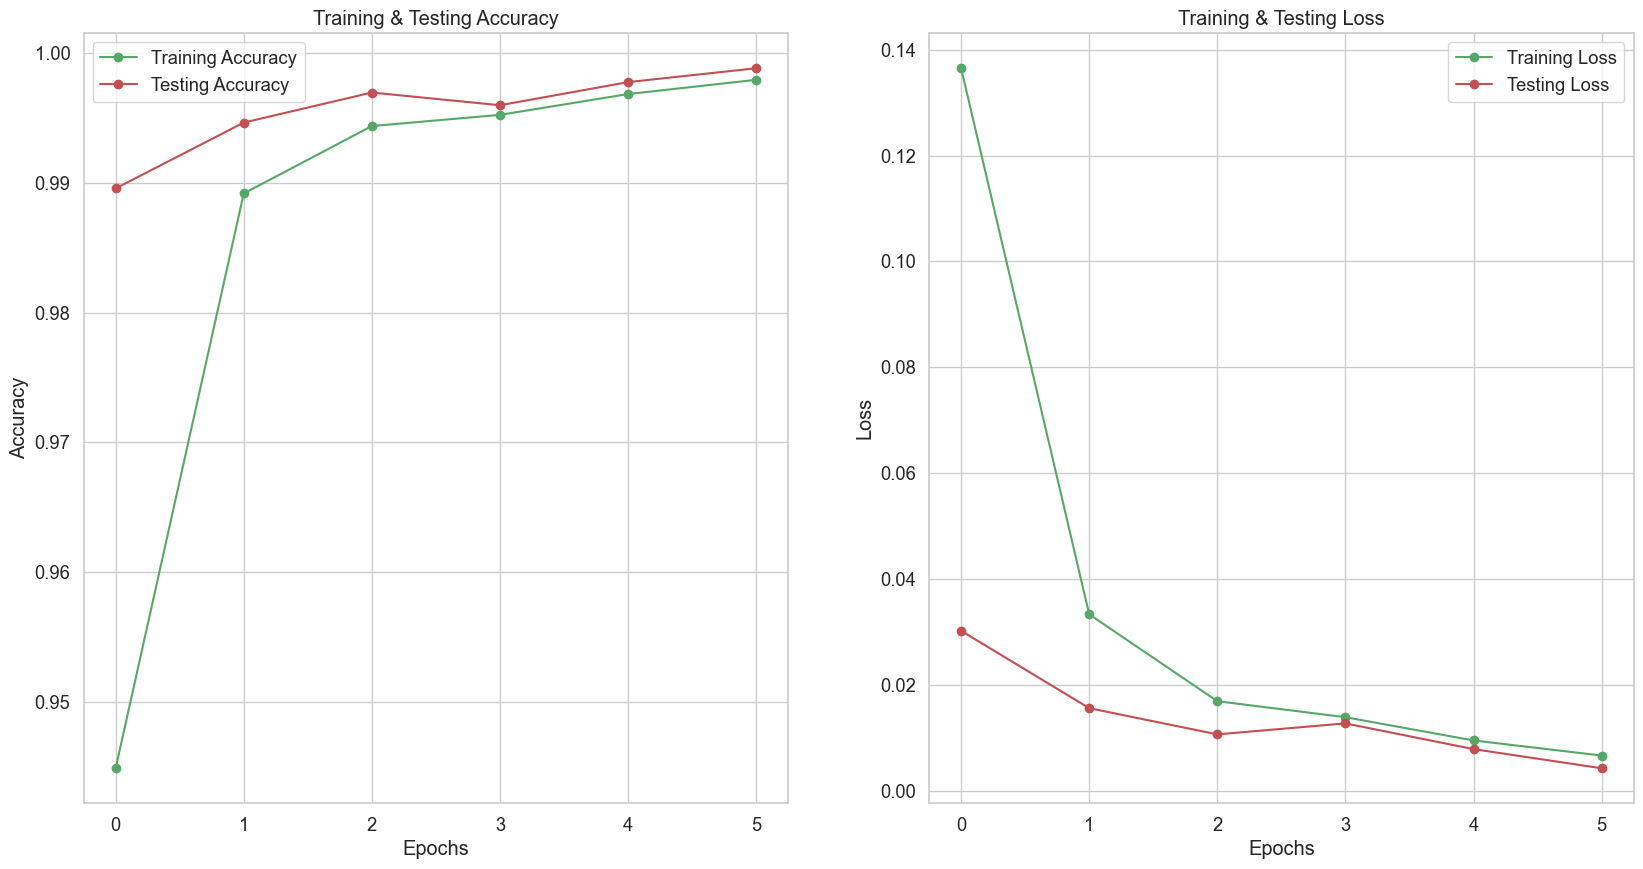

In [29]:
epochs = [i for i in range(6)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [30]:
pred = model.predict(X_test)
threshold = 0.5
pred = (pred > threshold).astype(int)
pred[:5]

351/351 [==============================] - 76s 214ms/step


array([[0],
       [0],
       [0],
       [1],
       [0]])

In [31]:
print(classification_report(y_test, pred, target_names = ['Fake', 'Not Fake']))

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      5938
    Not Fake       1.00      1.00      1.00      5287

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [32]:
cm = confusion_matrix(y_test,pred)
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])
cm

,Fake,Original
Fake,5931,7
Original,6,5281


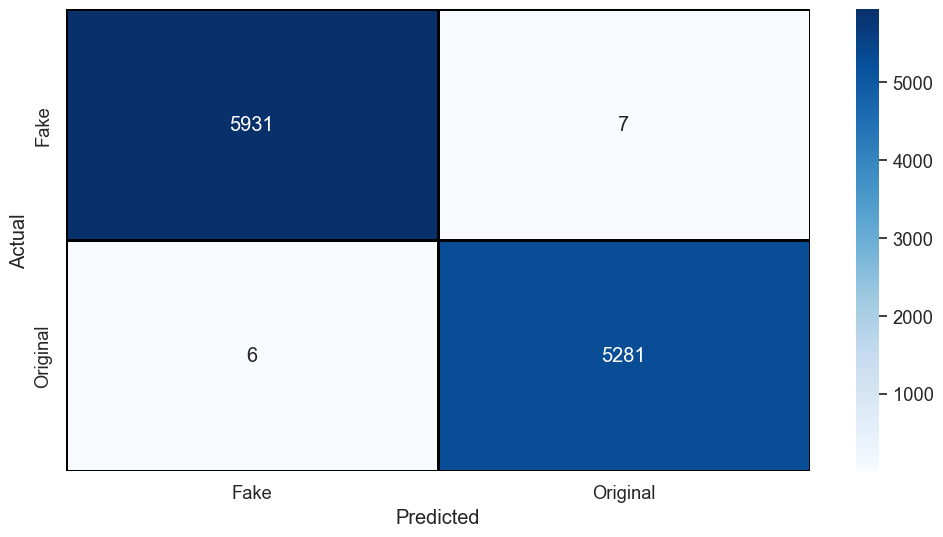

In [33]:
plt.figure(figsize = (12,6))
sns.heatmap(cm, cmap= "Blues", linecolor = 'black', linewidth = 1, annot = True, fmt='', xticklabels = ['Fake','Original'], yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()